# Performing Analysis of Meteorological Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Read Dataset

In [ ]:
data = pd.read_csv("weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [ ]:
data.shape

(96453, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [ ]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [ ]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

### Pairwise correlation of all columns in the data frame

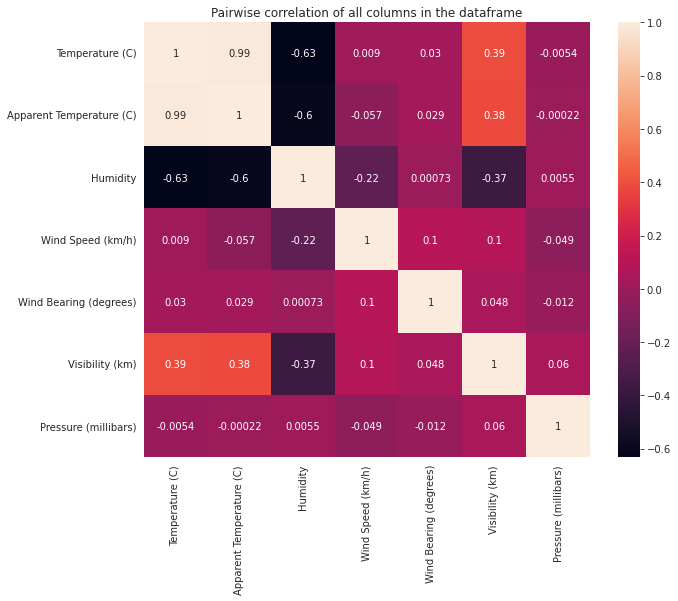

In [ ]:
# Increase the size of the heatmap
plt.figure(figsize=(10,8))
# Store heatmap object in a variable to easily access it when we want to include more features and set the annotation to True to display the correlation values on the heatmap.
sns.heatmap(data= data.corr(), annot=True)
# Title to the heatmap. 
plt.title("Pairwise correlation of all columns in the dataframe")
# saving the figure
plt.savefig("plot6.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
data["Formatted Date"] = pd.to_datetime(data["Formatted Date"],utc=True)

In [ ]:
data = data.set_index("Formatted Date")
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.


In [ ]:
df_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = data[df_column].resample("MS").mean() #MS-Month Starting
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


### Relation between Apparent Temperature & Humidity Using Regplot

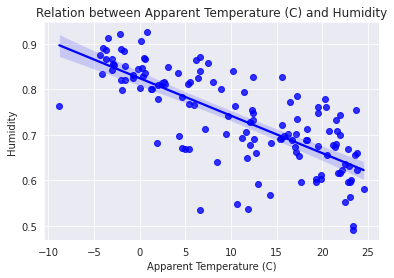

In [ ]:
sns.set_style("darkgrid")
sns.regplot(data=df_monthly_mean, x="Apparent Temperature (C)", y="Humidity", color="b")
plt.title("Relation between Apparent Temperature (C) and Humidity")
plt.show()

### Correlation between Apparent temperature & Humidity

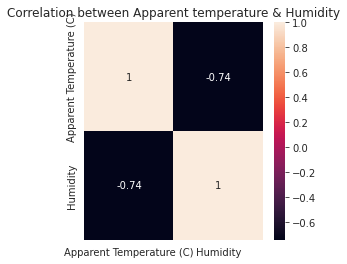

In [ ]:
# Pair plot for correlation of Apparent temperature & Humidity
sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.title("Correlation between Apparent temperature & Humidity")
sns.heatmap(data= df_monthly_mean.corr(), annot=True)
plt.show()

###Pair plot for correlation of Apparent temperature & Humidity

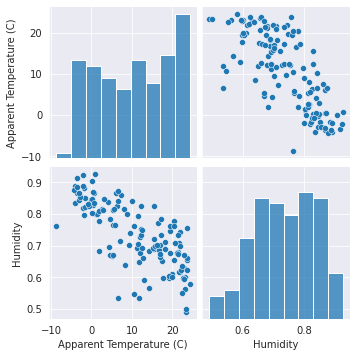

In [ ]:
sns.pairplot(df_monthly_mean, kind='scatter')

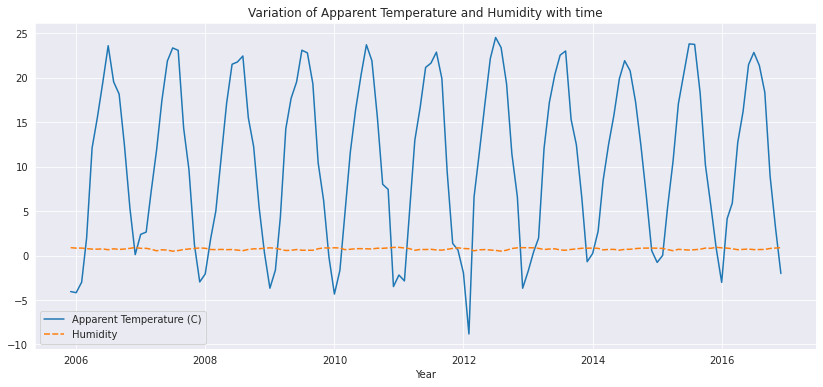

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data = df_monthly_mean)
plt.xlabel('Year')
plt.title("Variation of Apparent Temperature and Humidity with time")
plt.show()

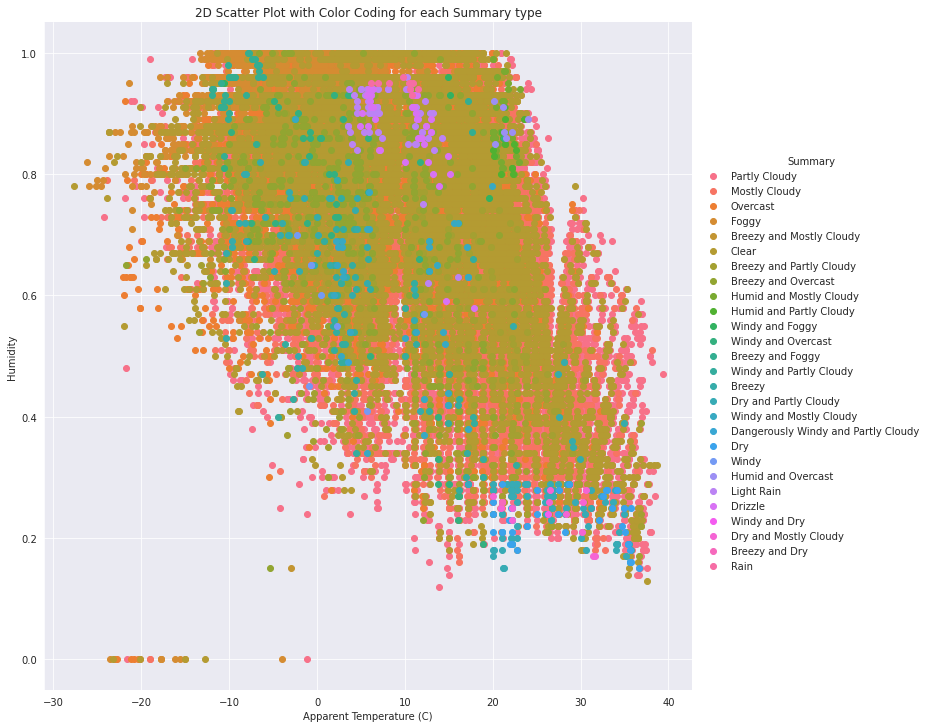

In [ ]:
sns.set_style("darkgrid")
sns.FacetGrid(data, hue="Summary", height=10).map(plt.scatter, "Apparent Temperature (C)", "Humidity").add_legend()
plt.title("2D Scatter Plot with Color Coding for each Summary type")
# save the figure
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
TEMP_DATA = df_monthly_mean.iloc[:,0]
HUM_DATA = df_monthly_mean.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'
def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,label=label,color=color,marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.show()

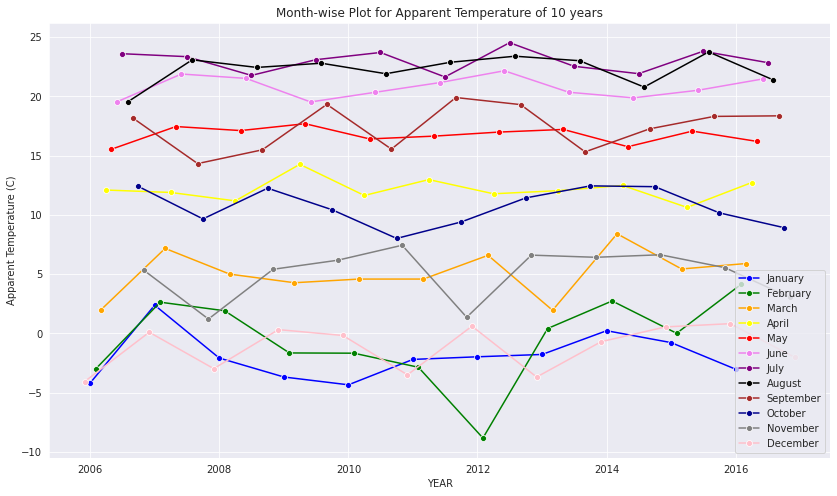

In [ ]:
# Month-wise Plot for Apparent Temperature of 10 years 
title = 'Month-wise Plot for Apparent Temperature of 10 years' 
sns_plot(title, TEMP_DATA)

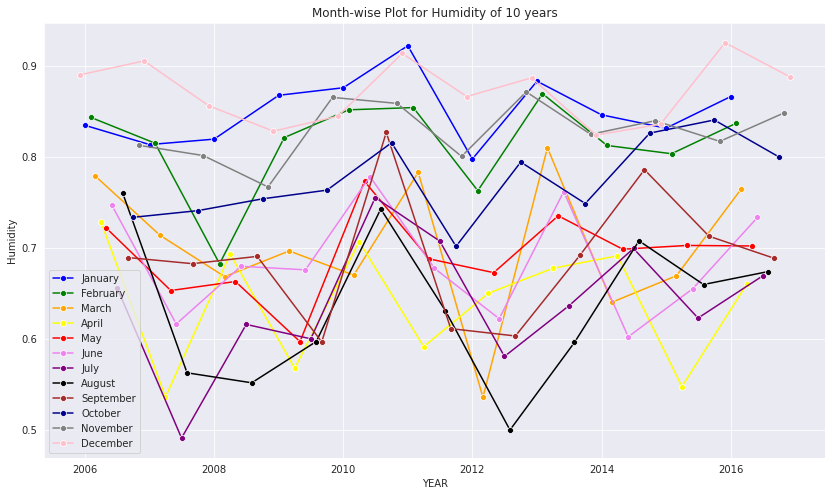

In [ ]:
# Month-wise Plot for Humidity of 10 years 
title = 'Month-wise Plot for Humidity of 10 years' 
sns_plot(title, HUM_DATA)

### Function for plotting Humidity & Apparent Temperature for each month

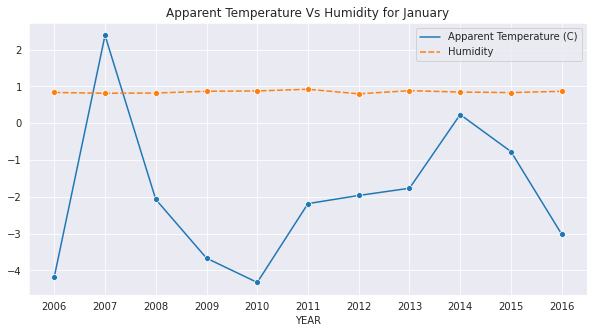

--------------------------------------------------------------------------------


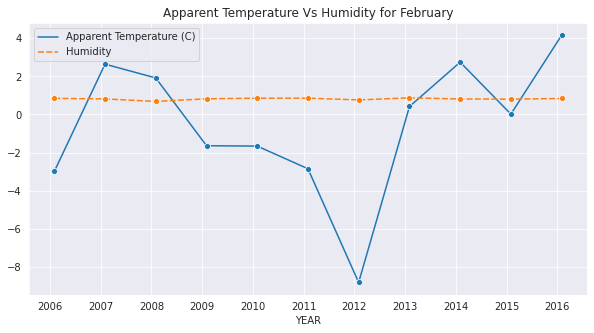

--------------------------------------------------------------------------------


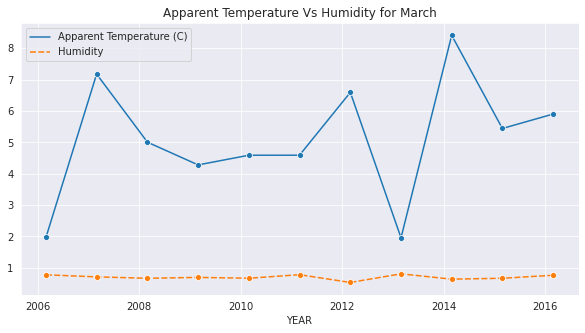

--------------------------------------------------------------------------------


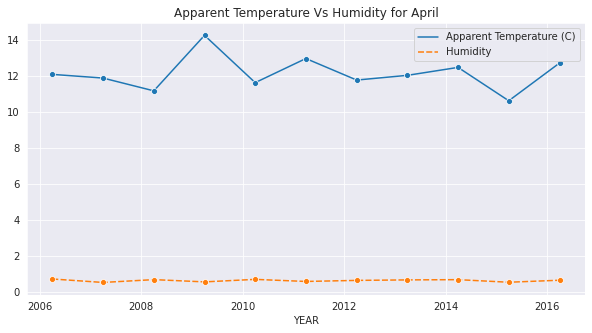

--------------------------------------------------------------------------------


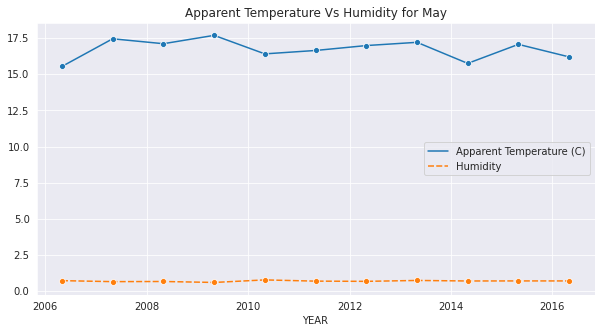

--------------------------------------------------------------------------------


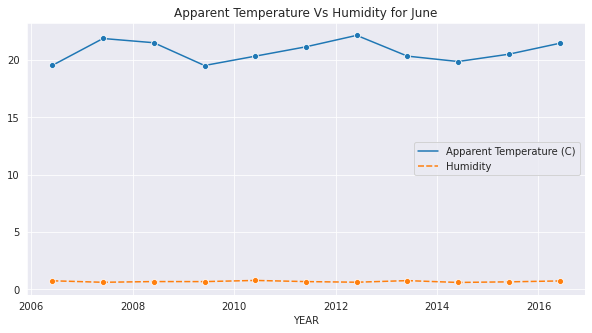

--------------------------------------------------------------------------------


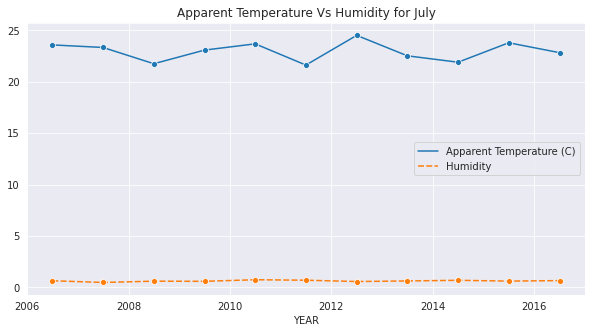

--------------------------------------------------------------------------------


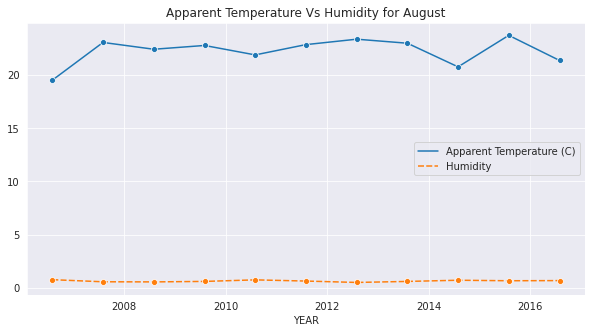

--------------------------------------------------------------------------------


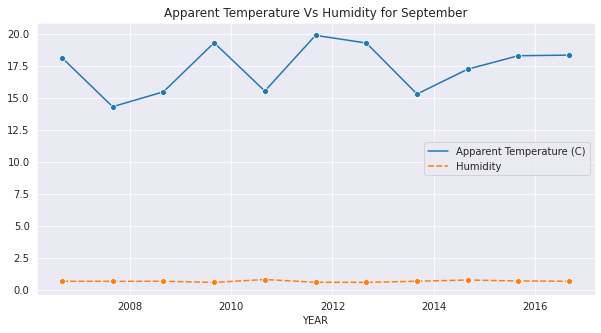

--------------------------------------------------------------------------------


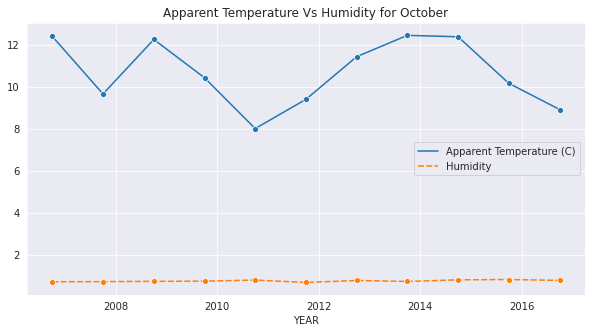

--------------------------------------------------------------------------------


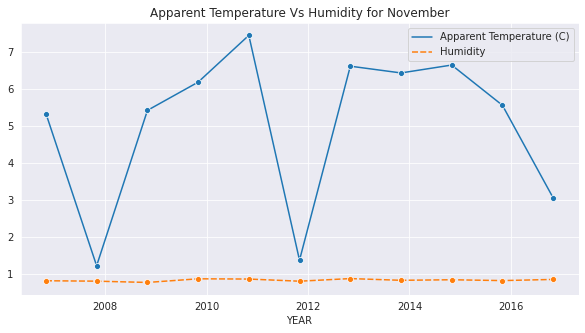

--------------------------------------------------------------------------------


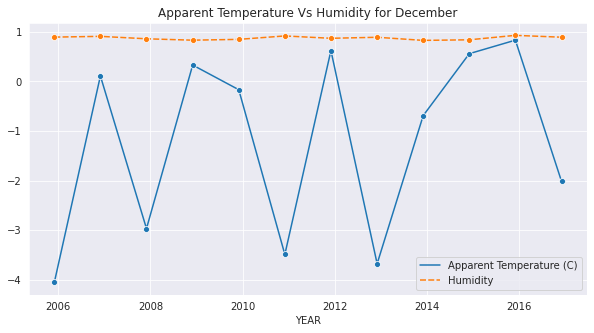

--------------------------------------------------------------------------------


In [ ]:
# Function for plotting Apparent Temperature & Humidity for each month
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Apparent Temperature Vs Humidity for {}'.format(label))
    plt.xlabel('YEAR')
    data = df_monthly_mean[df_monthly_mean.index.month == month]
    sns.lineplot(data=data, marker='o')
    name="month"+str(month)+".png"
    plt.savefig(name, dpi=300, bbox_inches='tight')  
    plt.show()
    print('-'*80)
# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)